## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
mouse_merge.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of entries in dataframe.
num_entries = mouse_merge["Mouse ID"].count()
print(num_entries)

1893


In [5]:
# Checking the number of mice in dataframe
mouse_merge["Mouse ID"].nunique()

249

In [6]:
# Create DF identifying mice with duplicate time stamps
# mouse_dup = mouse_merge.loc[mouse_merge.duplicated(),:]
mouse_dup = mouse_merge.loc[mouse_merge.duplicated(subset=["Mouse ID","Timepoint"]),:]

In [7]:
mouse_dup.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Mouse "g989" has duplicate timestamp entries at 0,5,10,15 and 20 Timepoints

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989=mouse_merge[mouse_merge["Mouse ID"]=="g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean=mouse_merge[mouse_merge["Mouse ID"]!="g989"]
mouse_clean.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = mouse_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = mouse_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev = mouse_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = mouse_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regimen_vol_df = pd.DataFrame(
    {"Mean": mean,
     "Median": median,
     "Variance": variance,
     "Std Deviation": stdev,
     "Standard Error": sem
    })
regimen_vol_df


,Mean,Median,Variance,Std Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_mouse_df = mouse_clean.groupby("Drug Regimen").agg([np.mean,np.median,np.var,np.std,scipy.stats.sem])["Tumor Volume (mm3)"]
regimen_mouse_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create Dataframe of Timepoints grouped by Drug Regimen
timepoints_df = mouse_clean.groupby("Drug Regimen").count()["Timepoint"]
timepoints_df.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

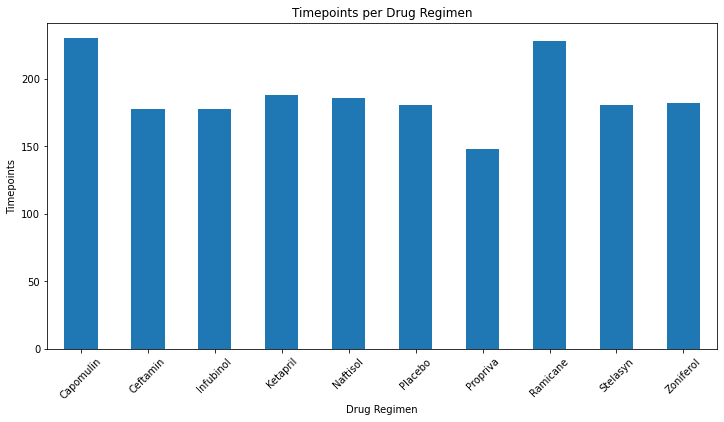

In [14]:
# Create bar chart using pandas
ax = timepoints_df.plot.bar(x="Drug Regimen",y="Timepoint",rot=45,title="Timepoints per Drug Regimen",ylabel="Timepoints",figsize=(12,6),position=0.5)

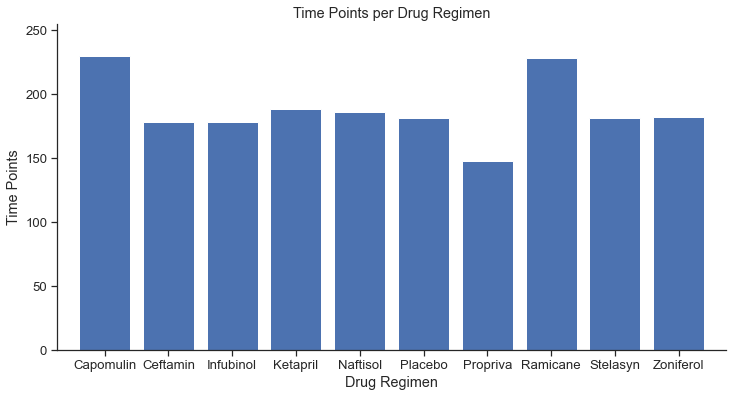

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Create lists for x and y axis 
timepoints_df=timepoints_df.reset_index()
x_axis = timepoints_df["Drug Regimen"].tolist()
y_axis = timepoints_df["Timepoint"].tolist()

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, y_axis, color='b', alpha=1.0, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+25)

# Give our chart some labels and a tile
plt.title("Time Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points");

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [33]:
num_sex_df = mouse_clean.groupby("Sex").count()#["Mouse ID"]
num_sex_df = num_sex_df.rename(columns={"Mouse ID":"Number"})
num_sex_df

,Number,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


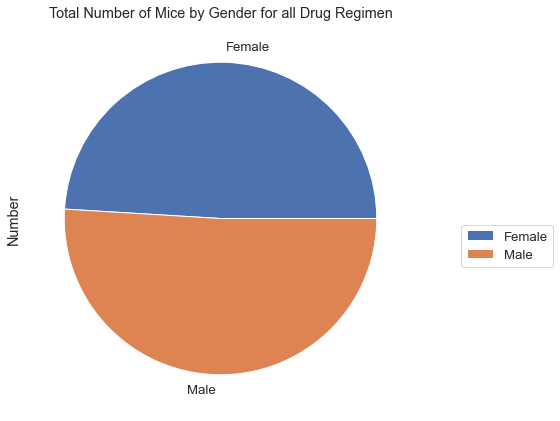

In [75]:

# plot = num_sex_df.plot.pie(y='Number',figsize=(7, 9))
plot = num_sex_df.plot.pie(y="Number",figsize=(7, 9))
plot.set_title("Total Number of Mice by Gender for all Drug Regimen")
plt.legend(bbox_to_anchor=(1.1,0.5));


No handles with labels found to put in legend.


<Figure size 1008x1296 with 0 Axes>

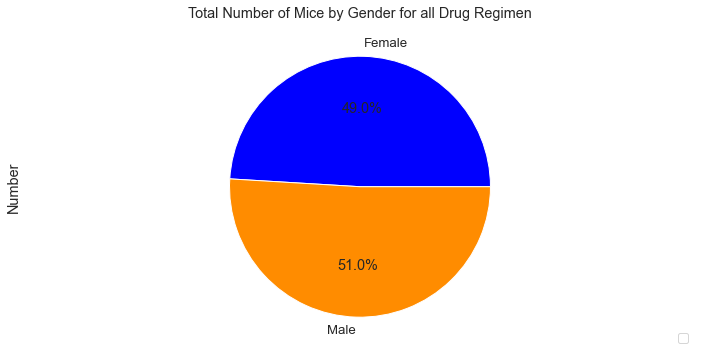

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# # Import our dependencies
# import matplotlib.pyplot as plt
# import numpy as np

# %matplotlib inline

plt.figure(figsize=(14,18))

# plt.figure(figsize=(14,18))


# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
num_sex = mouse_clean.groupby("Sex").count()["Mouse ID"].tolist()

# The colors of each section of the pie chart
# plt.get_cmap(“oranges”, 10)
colors = ["blue", "darkorange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

fig1, ax1 = plt.subplots(1,1)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Total Number of Mice by Gender for all Drug Regimen")
ax1.set_ylabel('Number')

plt.legend(loc="lower right")

plt.pie(num_sex, labels=["Female","Male"], colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0);

plt.show();

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# This is my first approach - not going to work work very well

tumor_vol_final = mouse_clean[mouse_clean["Timepoint"]==45]
tumor_vol_final.head()

num_vol_final = tumor_vol_final["Mouse ID"].count()

# Note that of the 248 unique mouse ID's in the study - only 130 have a tumor volume at Timepoint 45




In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Create data frame for each drug
cap_df = mouse_clean[(mouse_clean["Drug Regimen"]=="Capomulin")]
ram_df = mouse_clean[(mouse_clean["Drug Regimen"]=="Ramicane")]
inf_df = mouse_clean[(mouse_clean["Drug Regimen"]=="Infubinol")]
cef_df = mouse_clean[(mouse_clean["Drug Regimen"]=="Ceftamin")]

# Create data series matching up the last timepoint for each mouse ID
cap_last = cap_df.groupby("Mouse ID").max()["Timepoint"]
ram_last = ram_df.groupby("Mouse ID").max()["Timepoint"]
inf_last = inf_df.groupby("Mouse ID").max()["Timepoint"]
cef_last = cef_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Challenge is - I just created dataseries, not dataframe.....   Can I merge a data series?
# Approach #1 - Convert cap_last dataseries to dictionary and then create dataframe from list of dictionaries
# cap_last_dict = cap_last.to_dict()
cap_last_df = pd.DataFrame({"Timepoint": cap_last})
ram_last_df = pd.DataFrame({"Timepoint": ram_last})
inf_last_df = pd.DataFrame({"Timepoint": inf_last})
cef_last_df = pd.DataFrame({"Timepoint": cef_last})


# Merge *_last_df with mouse_merge (How = left, on "Mouse ID")
cap_final_df = pd.merge(cap_last_df,cap_df,how="left",on="Timepoint")
ram_final_df = pd.merge(ram_last_df,ram_df,how="left",on="Timepoint")
inf_final_df = pd.merge(inf_last_df,inf_df,how="left",on="Timepoint")
cef_final_df = pd.merge(cef_last_df,cef_df,how="left",on="Timepoint")

cap_final_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,s185,Capomulin,Female,3,17,23.343598,1
1,45,x401,Capomulin,Female,16,15,28.484033,0
2,45,m601,Capomulin,Male,22,17,28.430964,1
3,45,u364,Capomulin,Male,18,17,31.023923,3
4,45,y793,Capomulin,Male,17,17,31.896238,2
...,...,...,...,...,...,...,...,...
530,45,g316,Capomulin,Female,22,22,40.159220,2
531,45,s710,Capomulin,Female,1,23,40.728578,1
532,45,l509,Capomulin,Male,17,21,41.483008,3
533,45,r944,Capomulin,Male,12,25,41.581521,2


In [117]:
# At first glance - this does not look right - tumor volumes are too large for the end of the trial
# Check by looking at a single mouse - spot check looks good - tumor volume increased over time....
# Final value matches

a275 = mouse_clean[mouse_clean["Mouse ID"]=="a275"]

In [147]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Create Data Series for Tumor Volume for each Regimen

# cap_volume = cap_final_df.set_index(["Mouse ID"])["Tumor Volume (mm3)"]  # Not Necessary because I do not need the Mouse ID to calculate quartiles
cap_volume = cap_final_df["Tumor Volume (mm3)"]


# If the data is in a dataframe, we use pandas to give quartile calculations (Code Borrowed from "samples.ipny")
quartiles = cap_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset    
# Determine outliers using upper and lower bounds

cap_outliers = cap_final_df[(cap_final_df["Tumor Volume (mm3)"]<=lower_bound)|(cap_final_df["Tumor Volume (mm3)"]>=upper_bound)]  

type(cap_volume)

pandas.core.series.Series

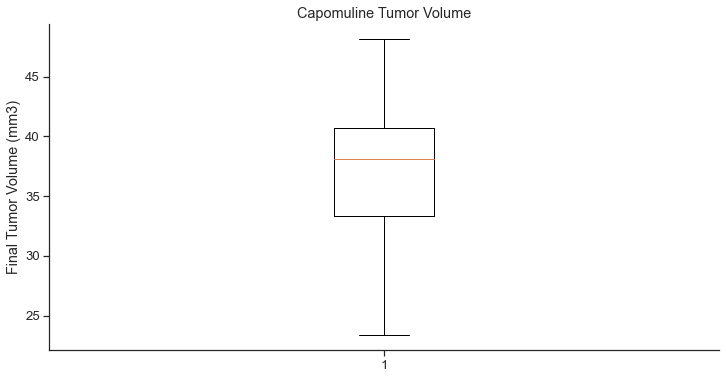

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Capomuline Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_volume)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
